# Project: Wrangling and Analyze Data(Twitter Archive For WeRateDogs)

Import all the libraries need for the project

In [3]:
import pandas as pd
import numpy as np
import os
import tweepy
import requests
import matplotlib.pyplot as plt
import json
import seaborn as sb
from PIL import Image
from io import BytesIO
%matplotlib inline

## Data Gathering
In the cells below,  we gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv). This was provided with the course.

In [3]:
#read the twitter_archived_data given
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

Using the requests library to download the tweet image prediction files programatically

In [4]:
#using the requests library to download the tweet image prediction 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

Writing the response into a file in memory and reading the file.

In [5]:
with open(url.split('/')[-1],'wb') as file:
    file.write(response.content)
#read the image_predictions.tsv file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

We load in the json file and read line by line into an empty list

In [7]:
twitter_list = []
# Read the .txt file line by line into a list of dictionaries.
for line in open('tweet_json.txt'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count']})

We then convert the list of Dictionaries(twitter_list) above to a pandas dataframe 

In [8]:
twitter_count = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count','favorite_count'])
twitter_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


 The three datasets we gathered for this analysis includes the **twitter archive dataset**, the **image prediction dataset** and the **twitter counts dataset**.

## Assessing Data




#### Visual Assessment

We view each of the three dataframes visually to check for both quality and tidiness issues

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


We can see that there are some null values in some of the columns of the dataset. The source column seems messy and might need some cleaning.The timestamp column contains two varaibles(date and time)in one column which breaks a law of tidy data that states that each variable must have its own column.

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Some of the column names are non descriptive

In [11]:
twitter_count

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programmatic Assesment

We asses the datasets programmatically with the help of some Pandas methods.

##### Twitter Archive

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We an see here that the timestamp column is of the wrong datatype. The tweet_id is also of the wrong datatype because although it's a number, it's mostly for identification, therefore we can change the datatype. We can also see that there are some columns with a lot of null values, these means that those columns might not be needed for the analysis and we might likely drop them.

In [13]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,None,None
737,780858289093574656,NaN,NaN,2016-09-27 19:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780858289...,10,10,Dash,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711732680...,10,10,None,None,None,None,None


We can see that some dogs have the name None which might be better as NaN values. The dog names have inconsistent format. Some starts with uppercase letters, while some starts with lowercase letters.

In [14]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


We can see that a lot of dogs have the name None duplicated, and also some inaccurate names such as 'a','the','quite','an' and others which suggests some innacurate data during the inital gathering process.

In [15]:
twitter_archive[twitter_archive.name == 'Emmy']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None


On further inspection, we can see that some retweets(retweeted_stauts_id is not null), is causing some of the names to be duplicated.

In [32]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


We check for the null values in each column to see which colums are likely to get dropped during analysis

In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Since there are a limited amount of types of sources, the source column could be classed as categorical

In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The above statistical assesment shows that both the rating numertor and the rating denominator have some outliers, because the most common denominator is 10 so having a denonimator of 170 seems inaccurate.

##### Image Prediction

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The column names are non descriptive and the datatype of the tweet_id is not of the type object.

In [20]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
122,668221241640230912,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,1,chow,0.395101,True,golden_retriever,0.372115,True,Labrador_retriever,0.148785,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
1974,869772420881756160,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1,Pembroke,0.980148,True,Cardigan,0.019271,True,malamute,0.000136,True
139,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True


The name of dog breeds in the p1 p2 and p3 columns are inconsistent, some start with upper case while some starts with lowercase.

##### Twitter count

In [21]:
twitter_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [22]:
twitter_count.sample(4)

,tweet_id,retweet_count,favorite_count
177,857263160327368704,4934,21041
2174,669203728096960512,522,1074
846,766069199026450432,1003,4765
1862,675362609739206656,262,1136


In [23]:
twitter_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Quality issues

#### Twitter Archives
1. Some columns need to be dropped as they wouldn't be useful during analysis.
2. There are some rows with retweets, and we need only the original tweets.
3. Incorrect Datatypes for the timestamp, source and tweet_id columns.
4. The source column is messy and not easy to understand.
5. Null values referred to as None in the name column.

#### Image Prediction
1. Incorrect datatype for tweet_id.
2. Some column names are non descriptive.
3. Unneeded columns need to be dropped.
4. The p1_conf, p2_conf and p3_conf columns should be percentages not proportions.
5. The p1, p2 and p3 columns have incosistent cases starting them and also have (_) separating them instead of a space.

### Tidiness issues

#### Twitter Archives
- The doggo, floofer, pupper and puppo columns should be one column known as the dog_growth column.
- The timestamp column contains two variables date and time which should be separate columns.
#### Image prediction
- Should be joined to the twitter archives dataframe as they are part of the same observational unit.

#### Twitter counts
- Should be joined to the twitter archives dataframe as they are part of the same observational unit.

## Cleaning Data


Make copies of the original datasets to allow for flexibility in acse of mistakes in the datasets dowm the line.

In [24]:
# Make copies of original pieces of data
twitter_archives_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_count_clean = twitter_count.copy()

### Quality

### Twitter Archives

### Issue #1:

#### Define: Remove all retweets from twitter_archives

#### Code

In [25]:
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.retweeted_status_id.isnull()]

#### Test

In [26]:
twitter_archives_clean[twitter_archives_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define : Drop columns that are not needed in the twitter archives dataset.

#### Code

In [27]:
twitter_archives_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'
                                        ,'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], inplace = True)


#### Test

In [28]:
list(twitter_archives_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3:

#### Define: Change the dataypes of the timestamp, source, and tweet_id to the correct datatypes

#### Code

In [29]:
twitter_archives_clean.timestamp = pd.to_datetime(twitter_archives_clean.timestamp)
twitter_archives_clean.tweet_id = twitter_archives_clean.tweet_id.astype(str)
twitter_archives_clean.source = twitter_archives_clean.source.astype('category')

#### Test

In [30]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 189.2+ KB


### Issue #4:

#### Define: Simplify the source column and make it easier to understand

#### Code

In [31]:
twitter_for_iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
vine = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
twitter_web_client = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
tweet_deck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
#replace the above variables with simpler names
twitter_archives_clean.source = twitter_archives_clean.source.replace(twitter_for_iphone,'Twitter For Iphone')
twitter_archives_clean.source = twitter_archives_clean.source.replace(vine,'Vine')
twitter_archives_clean.source = twitter_archives_clean.source.replace(twitter_web_client,'Twitter Web Client')
twitter_archives_clean.source = twitter_archives_clean.source.replace(tweet_deck,'TweetDeck')

#### Test

In [32]:
twitter_archives_clean.source.value_counts()

Twitter For Iphone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #5:

#### Define: Replace all None values with NaN in the names column

#### Code

In [33]:
twitter_archives_clean.name = twitter_archives_clean.name.replace('None', np.nan)

#### Test

In [34]:
twitter_archives_clean[twitter_archives_clean.name == 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Image Predictions

### Issue #1:

#### Define: Change the tweet id datatype to the correct datatype

#### Code

In [35]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [36]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue 2 :

#### Define: Drop unneeded columns

#### Code

In [37]:
image_predictions_clean.drop(['img_num', 'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], axis = 1, inplace = True)

#### Test

In [38]:
list(image_predictions_clean)

['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']

### Issue 3:

#### Define: Rename the columns with more descriptive names

#### Code

In [39]:
image_predictions_clean = image_predictions_clean.rename(columns = {'jpg_url':'url','p1':'prediction',
                                                                    'p1_conf':'prediction_confidence',
                                                                    'p1_dog':'prediction_result'})

#### Test

In [40]:
list(image_predictions_clean)

['tweet_id', 'url', 'prediction', 'prediction_confidence', 'prediction_result']

### Issue 4:

#### Define: Change the prediction_confidence columns to percentages.

#### Code

In [41]:
image_predictions_clean.prediction_confidence = image_predictions_clean.prediction_confidence.apply(lambda x : round(x * 100,2))

#### Test

In [42]:
image_predictions_clean.prediction_confidence

0       46.51
1       50.68
2       59.65
3       40.81
4       56.03
5       65.11
6       93.30
7       69.25
8       96.25
9       20.15
10      77.59
11      50.37
12      26.09
13      48.98
14      19.52
15      58.23
16      29.86
17      96.59
18       8.65
19      17.61
20      85.75
21      91.47
22      41.67
23      85.87
24      33.69
25      99.65
26      32.65
27      97.81
28      52.91
29      40.46
        ...  
2045    99.92
2046    73.90
2047    30.97
2048    79.35
2049    73.39
2050    33.07
2051    80.92
2052    13.04
2053    82.17
2054    99.50
2055    80.92
2056    70.04
2057    46.98
2058    71.47
2059    62.62
2060    95.34
2061    99.17
2062    96.63
2063    37.74
2064    95.80
2065    51.13
2066    48.76
2067    56.61
2068    34.17
2069    42.56
2070    55.57
2071    17.03
2072    71.60
2073    32.36
2074     9.70
Name: prediction_confidence, Length: 2075, dtype: float64

### Issue 5:

#### Define: Change all the first letters of the prediction column to capital case and replace the _ with space.

#### Code

In [43]:
image_predictions_clean.prediction = image_predictions_clean.prediction.str.capitalize()

In [59]:
image_predictions_clean.prediction = image_predictions_clean.prediction.str.replace('_'," ")

#### Test

In [60]:
image_predictions_clean.prediction

0            Welsh springer spaniel
1                           Redbone
2                   German shepherd
3               Rhodesian ridgeback
4                Miniature pinscher
5              Bernese mountain dog
6                        Box turtle
7                              Chow
8                     Shopping cart
9                  Miniature poodle
10                 Golden retriever
11                    Gordon setter
12                     Walker hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English setter
17                              Hen
18                 Desktop computer
19                Italian greyhound
20                      Maltese dog
21                 Three-toed sloth
22                               Ox
23                 Golden retriever
24                         Malamute
25                       Guinea pig
26      Soft-coated wheaten terrier
27                        Ch

### Tidiness

### Issue 1:

#### Define: Create a new column call dog_growth with doggo, floofer, pupper and puppo as the values which would be extracted from the text column. Drop the doggo, floofer, pupper and puppo columns. Because of the limited options for the values in the column, the datatype category is much more suitable. Change the dog_growth column to the correct datatype.

In [45]:
twitter_archives_clean['dog_growth'] = twitter_archives_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)
#drop the existing doggo, floofer, pupper and puppo columns
twitter_archives_clean = twitter_archives_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [46]:
#change the datatype to category
twitter_archives_clean.dog_growth = twitter_archives_clean.dog_growth.astype('category')

#### Test

In [48]:
list(twitter_archives_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_growth']

In [47]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
dog_growth            240 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 138.2+ KB


### Issue 2:

#### Define: Split the timestamp column to two dufferent columns date and time. Drop the timestamp column afterwards.

#### Code

In [49]:
twitter_archives_clean['date'] = twitter_archives_clean.timestamp.apply(lambda x : x.strftime('%d-%m-%Y'))
twitter_archives_clean['time'] = twitter_archives_clean.timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

In [50]:
twitter_archives_clean.drop(columns = ['timestamp'], inplace = True)

[The strftime() function is used to convert date and time objects to their string representation. It takes one or more input of formatted code and returns the string representation.](https://www.geeksforgeeks.org/python-strftime-function/)

Since the strftime() function returns a string, we might have to convert the date and time columns to their correct datatype.

In [51]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
dog_growth            240 non-null category
date                  2175 non-null object
time                  2175 non-null object
dtypes: category(1), int64(2), object(6)
memory usage: 155.2+ KB


We can see that both the date and time columns are of the datatype str which isn't the right datatype. We convert them to the right datatypes below.

In [52]:
twitter_archives_clean.time = pd.to_datetime(twitter_archives_clean.time).dt.time
twitter_archives_clean.date = pd.to_datetime(twitter_archives_clean.date)

#### Test

In [53]:
list(twitter_archives_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_growth',
 'date',
 'time']

In [112]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
dog_growth            240 non-null category
date                  2175 non-null datetime64[ns]
time                  2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 155.2+ KB


In [54]:
twitter_archives_clean.sample()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_growth,date,time
1134,728653952833728512,Twitter For Iphone,This is Coleman. Somebody needs to tell him th...,8,10,Coleman,NaN,2016-06-05,18:33:34


### Issue 3:

#### Define: Join  image_predictions_clean and twitter_archives_clean

#### Code

In [61]:
twitter_archive_master = pd.merge(twitter_archives_clean,image_predictions_clean, on = 'tweet_id', how = 'left')

#### Test

In [65]:
twitter_archive_master.sample()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_growth,date,time,url,prediction,prediction_confidence,prediction_result
1843,672068090318987265,Twitter For Iphone,Say hello to Gizmo. He's upset because he's no...,7,10,Gizmo,NaN,2015-02-12,15:01:33,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,Pug,86.34,True


### Issue 4:

#### Define: Join the twitter_archive_master to the twitter_count_clean

#### Code

In [66]:
twitter_archive_master = pd.merge(twitter_archive_master,twitter_count_clean, on = 'tweet_id', how = 'left')

#### Test

In [67]:
twitter_archive_master.sample()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_growth,date,time,url,prediction,prediction_confidence,prediction_result,retweet_count,favorite_count
1433,685321586178670592,Twitter For Iphone,This is Rocky. He sleeps like a psychopath. 10...,10,10,Rocky,NaN,2016-08-01,04:46:13,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,Boston bull,97.25,True,735,2910


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [4]:
#reading the newly stored master dataset stored in the twitter_archive_master.csv file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
list(twitter_archive_master)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_growth',
 'date',
 'time',
 'url',
 'prediction',
 'prediction_confidence',
 'prediction_result',
 'retweet_count',
 'favorite_count']

### Most Common Dog Breeds

We can get this by checking for when the predictions were true.

In [77]:
dog_breeds = twitter_archive_master[twitter_archive_master.prediction_result == True]
#Reset Index
dog_breeds = dog_breeds.reset_index()
#Get the top 10 most commonly tweeted dogs
popular_dog_breeds = dog_breeds['prediction'].value_counts().head(10)
popular_dog_breeds

Golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy poodle             38
Malamute               29
Name: prediction, dtype: int64

### Least Common Dog Breeds

In [94]:
# Get the 10 most uncommonly tweeted dogs
unpopular_dog_breeds = dog_breeds['prediction'].value_counts().tail(10)
unpopular_dog_breeds

Black-and-tan coonhound    2
Wire-haired fox terrier    2
Australian terrier         2
Clumber                    1
Entlebucher                1
Silky terrier              1
Scotch terrier             1
Groenendael                1
Japanese spaniel           1
Standard schnauzer         1
Name: prediction, dtype: int64

### Most Retweeted Dog Pictures

https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


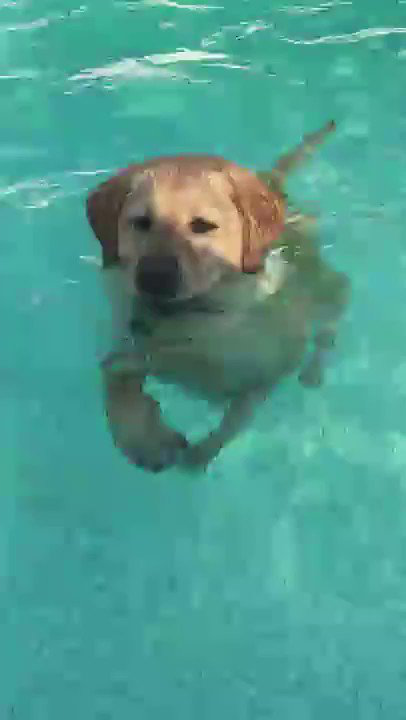

In [11]:
# Sort the twitter_master_archive data by  column name and get the top 5 most retweeted images.
def top_three(column):
    pictures_df = twitter_archive_master.sort_values(by = [column], ascending = False)
    #reset index_values
    pictures_df = pictures_df.reset_index()
    #get the top 3 rows
    pictures = pictures_df.loc[0:2]
    for picture in pictures['url']:
        url = picture
        print(url)
        response = requests.get(url)
        return Image.open(BytesIO(response.content))
        
top_three('retweet_count')

##### Most Retweeted Dog Picture

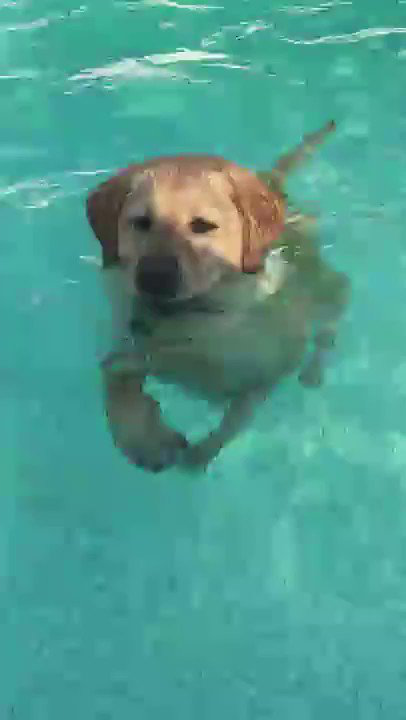

In [123]:
# Sort the twitter_master_archive data by  column name and get the top 5 most retweeted images.
pictures_df = twitter_archive_master.sort_values(by = ['retweet_count'], ascending = False)
#reset index_values
pictures_df = pictures_df.reset_index()
#get the top 3 rows
pictures = pictures_df.loc[0:2]
#get the individual url
url = pictures['url'].iloc[0]
#use the requests library to get the url files
response = requests.get(url)
#use the IO and PIL libraries to get and disply the content of the requested file
(Image.open(BytesIO(response.content)))

#####  Second Most Retweeted Dog Picture

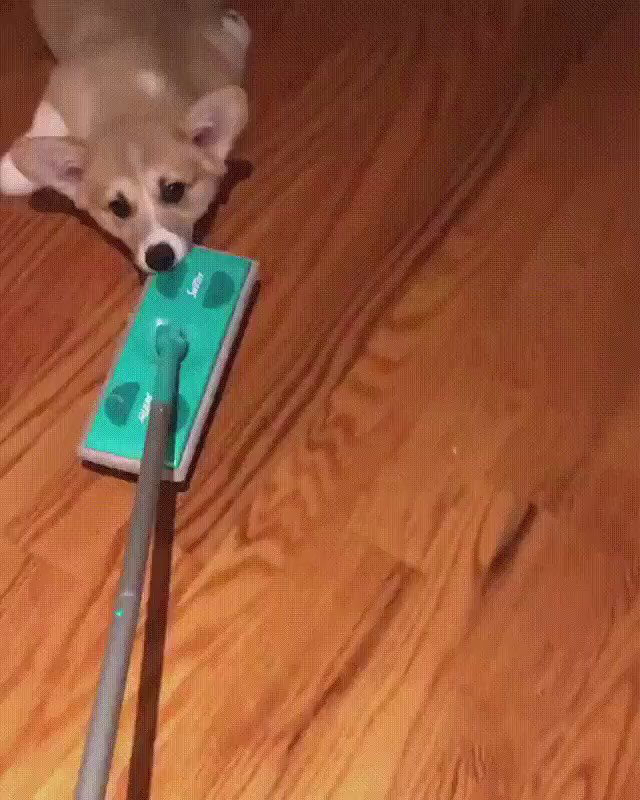

In [126]:
#get the individual url
url = pictures['url'].iloc[1]
#use the requests library to get the url files
response = requests.get(url)
#use the IO and PIL libraries to get and disply the content of the requested file
(Image.open(BytesIO(response.content)))

##### Third Most Retweeted Dog`

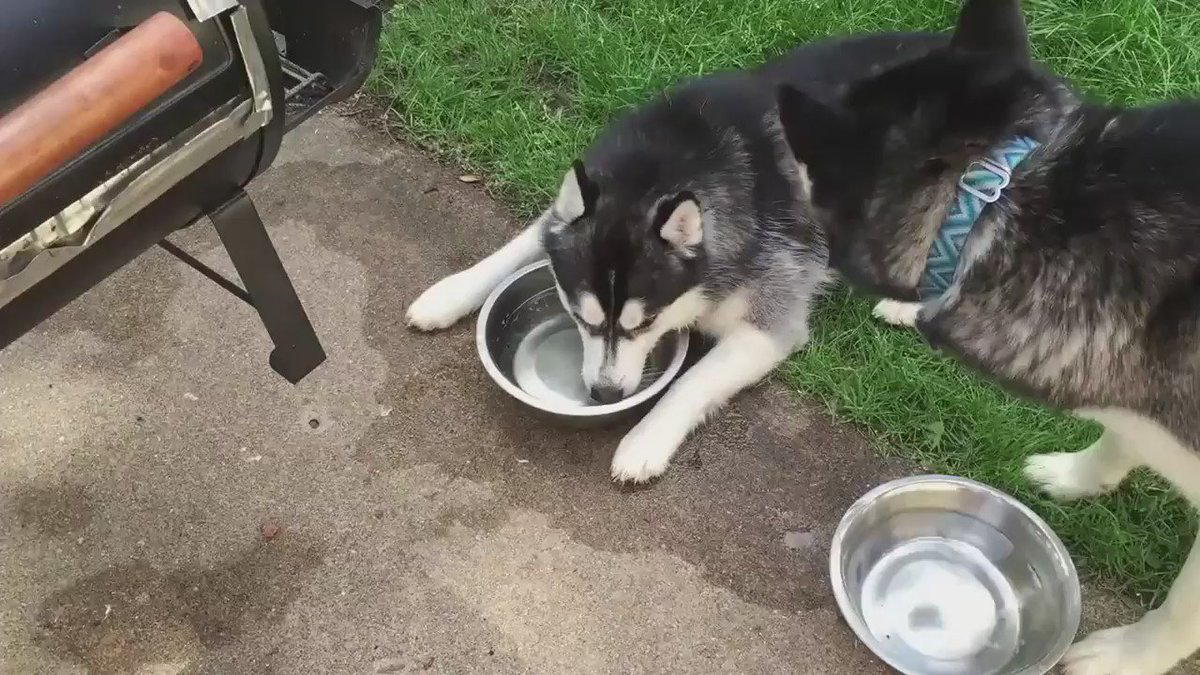

In [127]:
#get the individual url
url = pictures['url'].iloc[2]
#use the requests library to get the url files
response = requests.get(url)
#use the IO and PIL libraries to get and disply the content of the requested file
(Image.open(BytesIO(response.content)))

### Most Common Dog Name

 We can get these by making sure we get all the names excluding the NaN values in the dataset.

In [141]:
dog_names = twitter_archive_master[twitter_archive_master.name != 'NaN']
#Reset Index
dog_names = dog_names.reset_index()
#Get the top 10 most commonly tweeted dog names
popular_dog_names = dog_names['name'].value_counts().head(10)
popular_dog_names                              

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
Tucker      9
the         8
Sadie       8
Lola        8
Winston     8
Name: name, dtype: int64

### Compare Retweets and Favorites Relationship

 We can calculate the correlation beteween the retweets and favorites column using the .corr() method. A correlation of 1 shows a strong correlation while a correlation of zero shows zero or no relationship.

In [144]:
twitter_archive_master[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.911732
favorite_count,0.911732,1.000000


### Insights:
1. We can see that the most popular dog breeds tweeted was the Golden retriever followed by the Labrador retriever

2. We can see that there are up to 7 really uncommon dog breeds(Standard schnauzer, Japanes spaniel,Groenendael, Scotch Terrier, Silky Terrier, Entlebucher, Clumber) that were being tweeted.

3. We see that the names Charlie and Lucy are the most popular names amongs the names of dogs tweeted.

4. The calulated value of the correlation between the retweet and favorites column is 0.911732, which shows a very strong relationship between both columns. This means that a tweet with a high retweet value is likely to have a high favorites value. This is also supported by the visualization comparing them, which shows a strong linear relationship.

## Visualizations

#### Common Dog Breeds

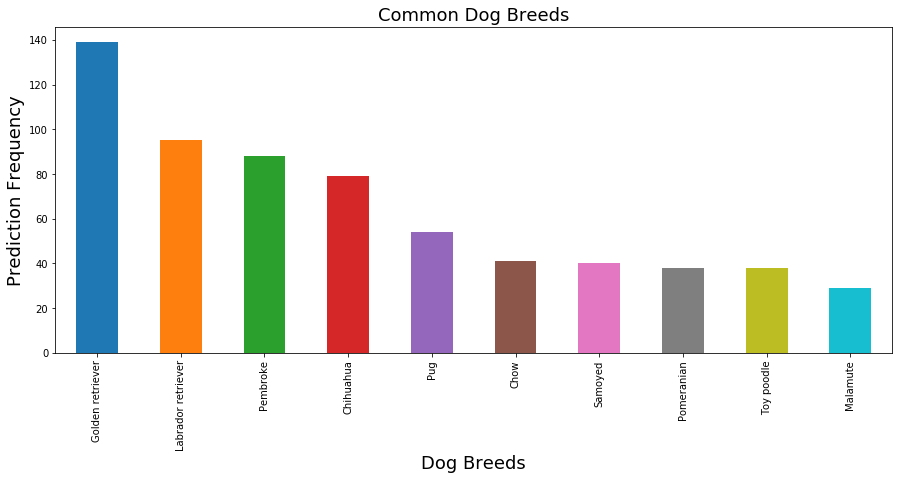

In [142]:
def bar_chart(df,xlabel,ylabel,title):
    plt.figure(figsize = (15,6))
    df.plot(kind = 'bar')
    plt.xlabel(xlabel,fontsize = 18);
    plt.ylabel(ylabel,fontsize = 18);
    plt.title(title,fontsize = 18)
bar_chart(popular_dog_breeds,'Dog Breeds',"Prediction Frequency",'Common Dog Breeds')

#### Common Dog Names

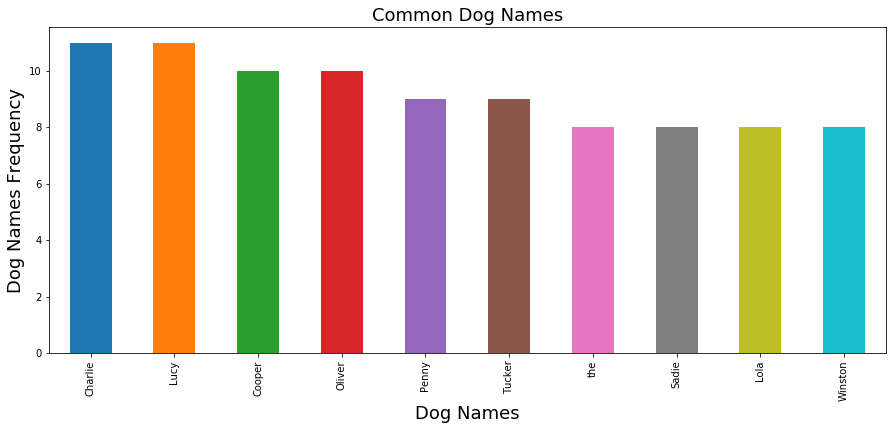

In [143]:
bar_chart(popular_dog_names,'Dog Names', 'Dog Names Frequency','Common Dog Names' )

##### Relationship Between Retweet Counts and Favorite Counts

Text(0,0.5,'Favorites Count')

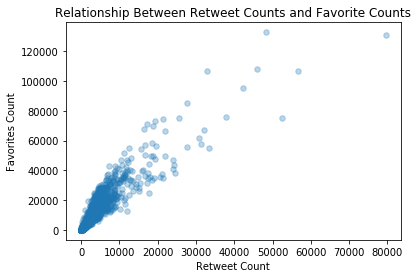

In [145]:
plt.scatter(x = twitter_archive_master.retweet_count, y =twitter_archive_master.favorite_count, alpha = 0.3, s = 30)
plt.title("Relationship Between Retweet Counts and Favorite Counts")
plt.xlabel("Retweet Count")
plt.ylabel("Favorites Count")